In [1]:
import pandas as pd
import numpy as np
from pyts.image import GramianAngularField
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

import statsmodels.api as sm 
import statsmodels.tsa.api as tsa
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
HORIZON: int = 1

In [3]:
# Lectura del archivo CSV
data = pd.read_csv('./data/madrid_clima.csv', index_col='time', parse_dates=True)

# Selección de las columnas deseadas
print(data.shape)

start_date = '2006-01-01'
data = data.loc[start_date:, ['tavg', 'tmin', 'tmax', 'pres', 'prcp']]

print(data.shape)
# Mostrar los valores nulos de cada columna
print(data.isnull().sum())


(30316, 10)
(6209, 5)
tavg      0
tmin      0
tmax      0
pres    747
prcp      0
dtype: int64


In [4]:
data.describe()

,tavg,tmin,tmax,pres,prcp
count,6209.000000,6209.000000,6209.000000,5462.000000,6209.000000
mean,16.125399,10.679884,20.725415,1017.318656,1.183669
std,8.090093,6.655471,9.004165,6.983429,3.924347
min,-3.300000,-7.500000,0.000000,986.900000,0.000000
25%,9.200000,5.200000,12.900000,1012.700000,0.000000
50%,15.000000,10.100000,19.600000,1016.400000,0.000000
75%,23.000000,16.300000,28.400000,1021.500000,0.000000
max,34.500000,26.100000,40.600000,1044.800000,67.700000


## Inputación

In [5]:
# Imputar los valores nulos en la columna 'tsun' por la media de la columna
data['pres'].fillna(data['pres'].mean(), inplace=True)
# data['wdir'].fillna(data['wdir'].mean(), inplace=True)
# data['wspd'].fillna(data['wspd'].mean(), inplace=True)

# Mostrar los valores nulos después de la imputación
print(data.isnull().sum())


tavg    0
tmin    0
tmax    0
pres    0
prcp    0
dtype: int64


In [6]:
"""
from sklearn.impute import KNNImputer

# Crear un imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Imputar los valores nulos en el DataFrame
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Mostrar los valores nulos después de la imputación
print(data.isnull().sum())
"""


'\nfrom sklearn.impute import KNNImputer\n\n# Crear un imputador KNN\nimputer = KNNImputer(n_neighbors=5)\n\n# Imputar los valores nulos en el DataFrame\ndata = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)\n\n# Mostrar los valores nulos después de la imputación\nprint(data.isnull().sum())\n'

## Composición de la serie temporal

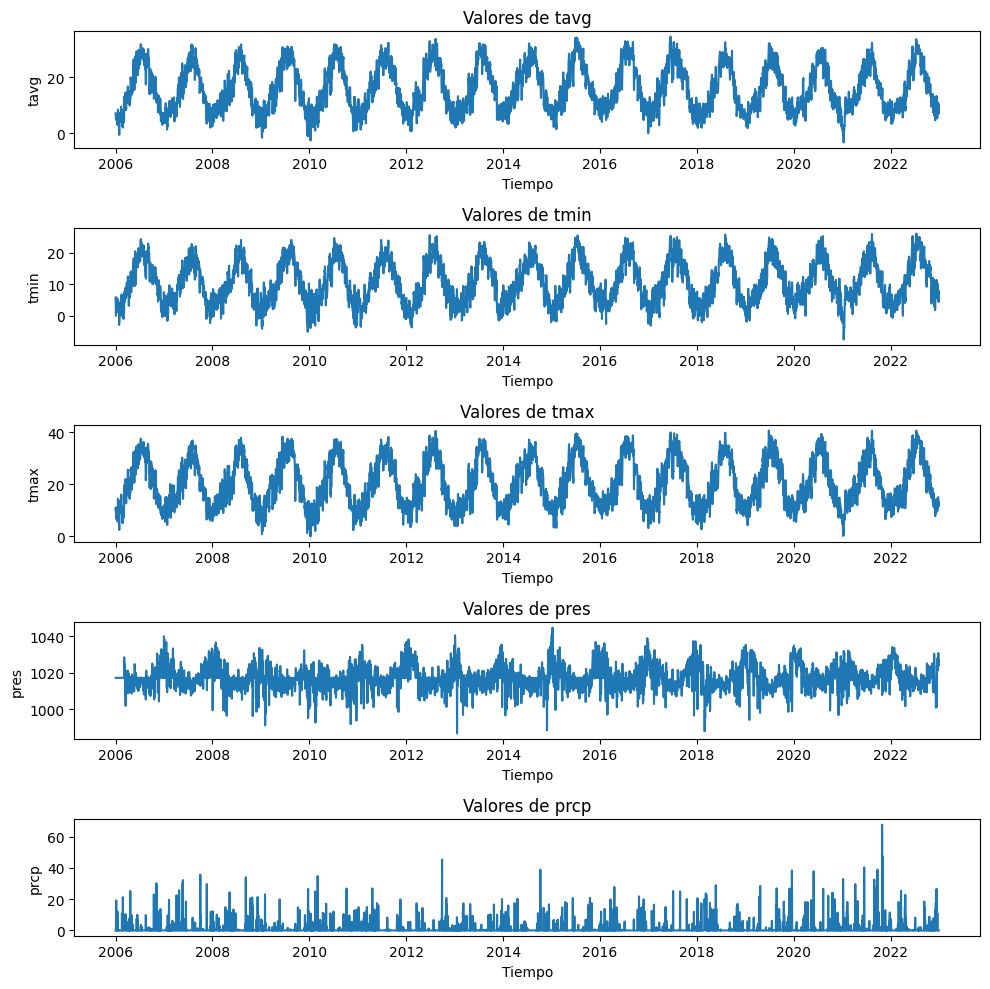

In [7]:
# Configuración de la figura
fig, axes = plt.subplots(nrows=len(data.columns), figsize=(10, 2 * len(data.columns)))

# Gráficas de los valores originales para cada columna
for i, column in enumerate(data.columns):
    # Obtener la serie temporal
    time_series = data[column]

    # Convertir el índice a fechas
    time_series.index = pd.to_datetime(time_series.index)

    # Graficar los valores originales
    axes[i].plot(time_series.index, time_series.values)
    axes[i].set_title(f'Valores de {column}')
    axes[i].set_xlabel('Tiempo')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()


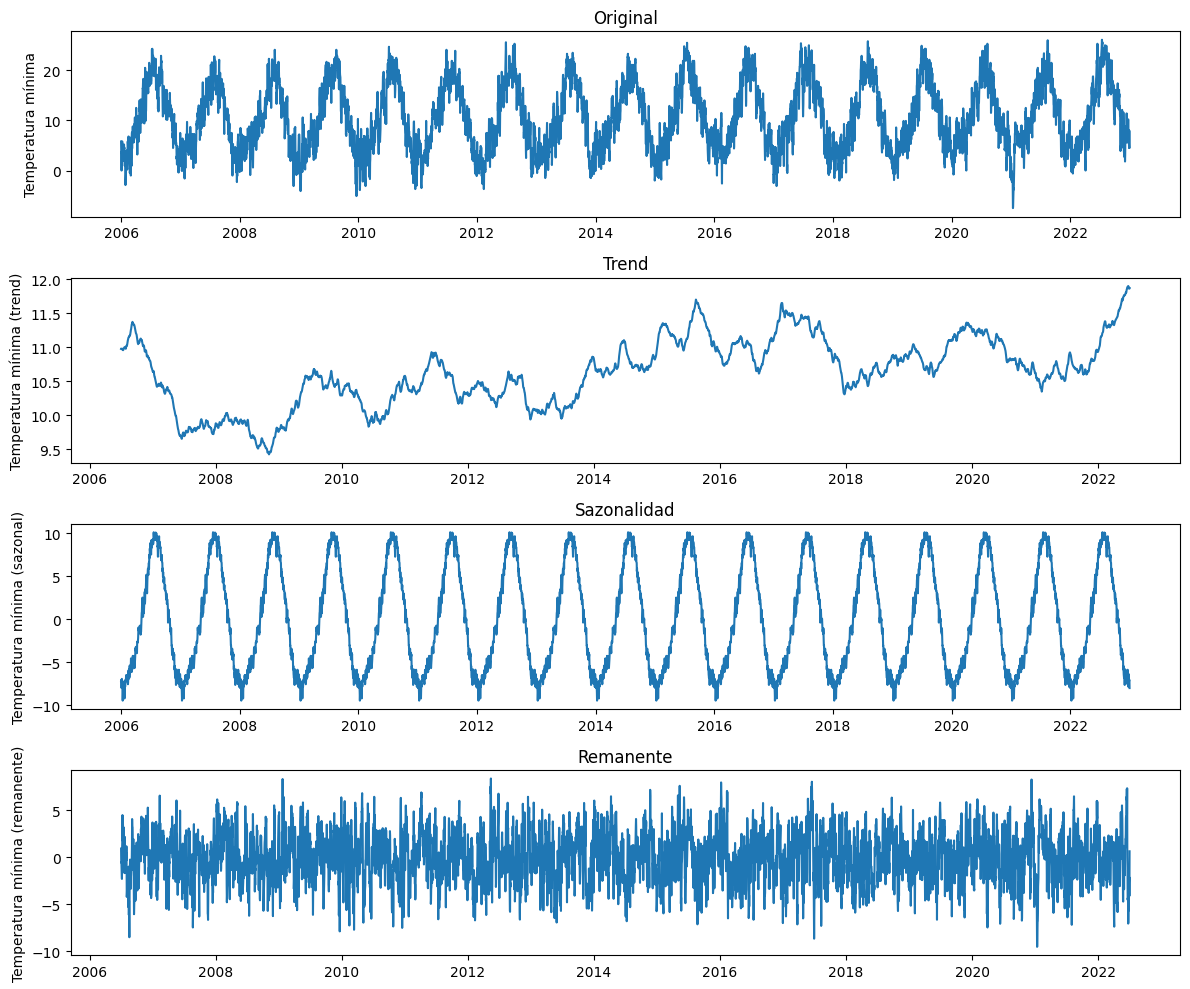

In [8]:
# Decompose the time series
columna = "tmin"
decomposed = seasonal_decompose(data[columna], model='additive', period=365)

# Plot the decomposed time series
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

axes[0].plot(data[columna])
axes[0].set_title('Original')
axes[0].set_ylabel('Temperatura mínima')

axes[1].plot(decomposed.trend)
axes[1].set_title('Trend')
axes[1].set_ylabel('Temperatura mínima (trend)')

axes[2].plot(decomposed.seasonal)
axes[2].set_title('Sazonalidad')
axes[2].set_ylabel('Temperatura mínima (sazonal)')

axes[3].plot(decomposed.resid)
axes[3].set_title('Remanente')
axes[3].set_ylabel('Temperatura mínima (remanente)')

plt.tight_layout()
plt.show()


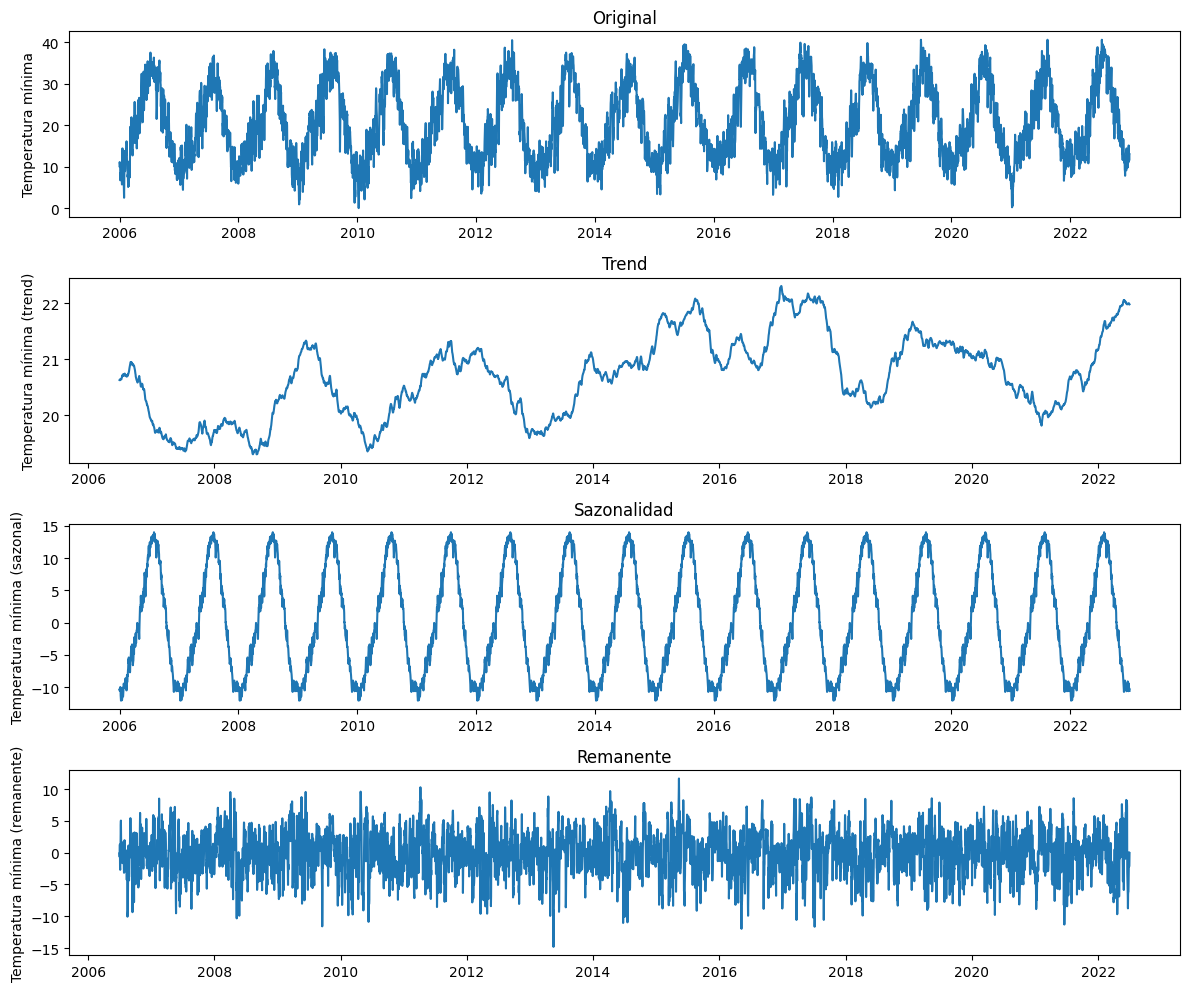

In [9]:
# Decompose the time series
columna = "tmax"
decomposed = seasonal_decompose(data[columna], model='additive', period=365)

# Plot the decomposed time series
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

axes[0].plot(data[columna])
axes[0].set_title('Original')
axes[0].set_ylabel('Temperatura mínima')

axes[1].plot(decomposed.trend)
axes[1].set_title('Trend')
axes[1].set_ylabel('Temperatura mínima (trend)')

axes[2].plot(decomposed.seasonal)
axes[2].set_title('Sazonalidad')
axes[2].set_ylabel('Temperatura mínima (sazonal)')

axes[3].plot(decomposed.resid)
axes[3].set_title('Remanente')
axes[3].set_ylabel('Temperatura mínima (remanente)')

plt.tight_layout()
plt.show()


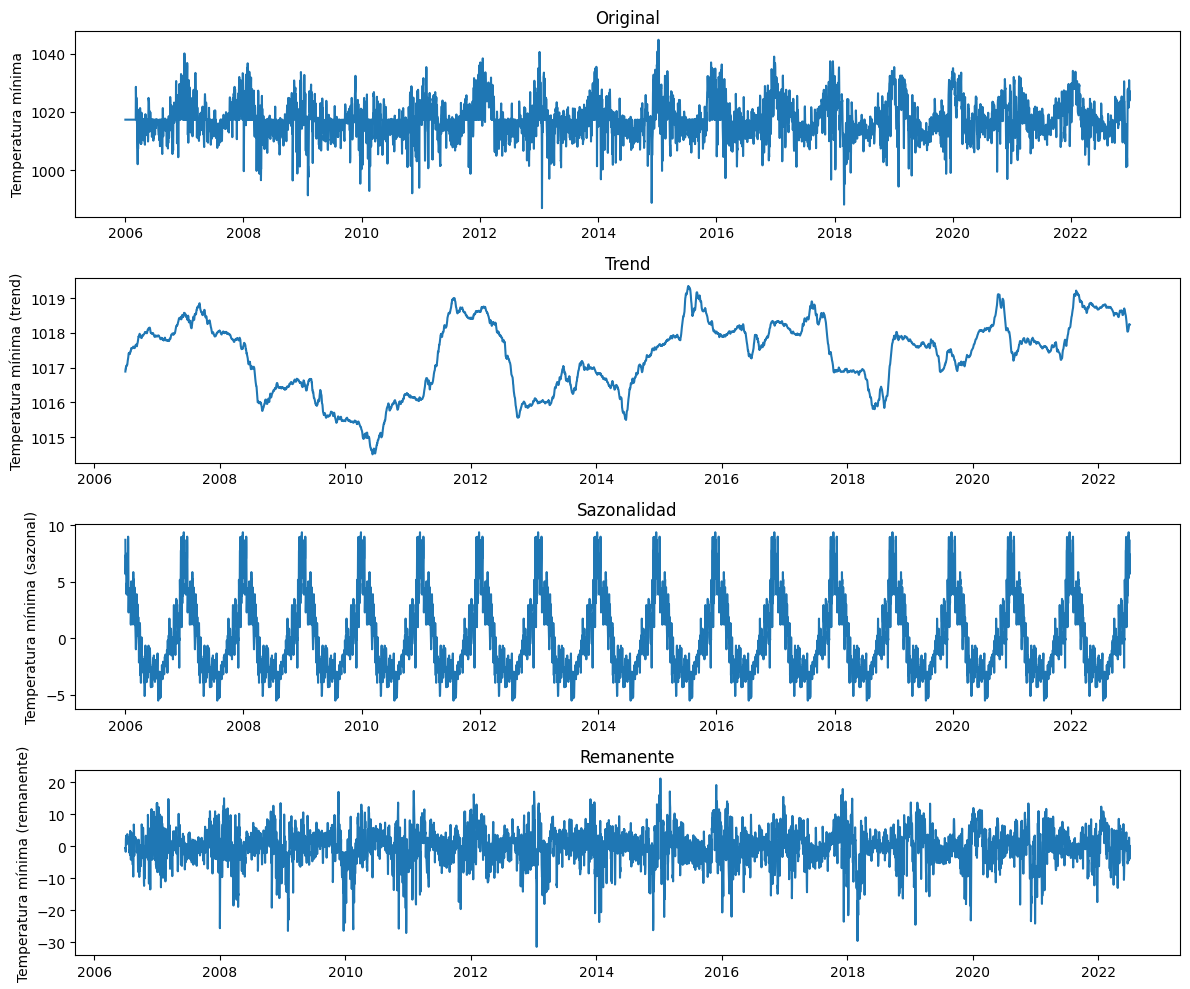

In [10]:
# Decompose the time series
columna = "pres"
decomposed = seasonal_decompose(data[columna], model='additive', period=365)

# Plot the decomposed time series
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

axes[0].plot(data[columna])
axes[0].set_title('Original')
axes[0].set_ylabel('Temperatura mínima')

axes[1].plot(decomposed.trend)
axes[1].set_title('Trend')
axes[1].set_ylabel('Temperatura mínima (trend)')

axes[2].plot(decomposed.seasonal)
axes[2].set_title('Sazonalidad')
axes[2].set_ylabel('Temperatura mínima (sazonal)')

axes[3].plot(decomposed.resid)
axes[3].set_title('Remanente')
axes[3].set_ylabel('Temperatura mínima (remanente)')

plt.tight_layout()
plt.show()

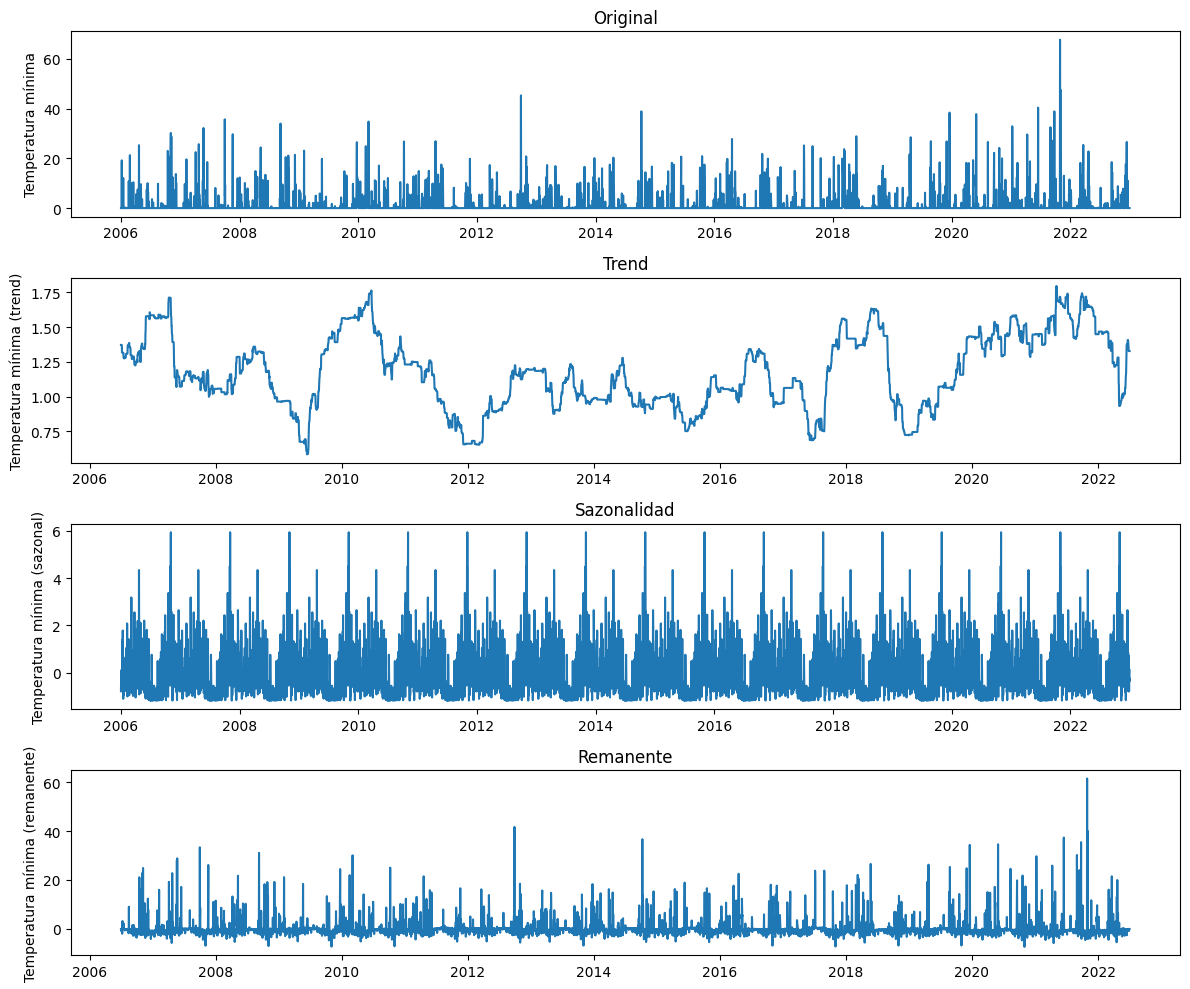

In [11]:
# Decompose the time series
columna = "prcp"
decomposed = seasonal_decompose(data[columna], model='additive', period=365)

# Plot the decomposed time series
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

axes[0].plot(data[columna])
axes[0].set_title('Original')
axes[0].set_ylabel('Temperatura mínima')

axes[1].plot(decomposed.trend)
axes[1].set_title('Trend')
axes[1].set_ylabel('Temperatura mínima (trend)')

axes[2].plot(decomposed.seasonal)
axes[2].set_title('Sazonalidad')
axes[2].set_ylabel('Temperatura mínima (sazonal)')

axes[3].plot(decomposed.resid)
axes[3].set_title('Remanente')
axes[3].set_ylabel('Temperatura mínima (remanente)')

plt.tight_layout()
plt.show()


## Predición con CNN

In [12]:
window_size = 48
y = (data['prcp'].shift(-window_size) >= 0.1).astype(int)[window_size:] 

# Inicializar el escalador MinMax
scaler = MinMaxScaler(feature_range=(-1, 1))

# Normalizar el DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [13]:
# Assuming you have a DataFrame named 'df' with columns 'tmin', 'tmax', 'prcp', and an index 'time'
# If not, you can create it using df = pd.DataFrame(data, columns=['tmin', 'tmax', 'prcp'], index=time)


windows = []

gasf_sum = GramianAngularField(method='summation')
gadf_dif = GramianAngularField(method='difference')

for i in range(len(data) - window_size + 1):
    window = data.iloc[i:i + window_size]
    chanels = []
    for key in window:
        # print(window[key].values)
        # print(gasf_sum.fit_transform([window[key].values]))
        chanels.append(gasf_sum.fit_transform([window[key].values])[0])
        chanels.append(gadf_dif.fit_transform([window[key].values])[0])
        
    channels_transposed = np.transpose(chanels, (1, 2, 0))
    windows.append(channels_transposed)

# Prepare the data for model training
X = np.array(windows[:-1])  # Input data (excluding the last window)
# y = (data['prcp'].shift(-window_size) >= 0.1).astype(int)[window_size:]  # Target variable


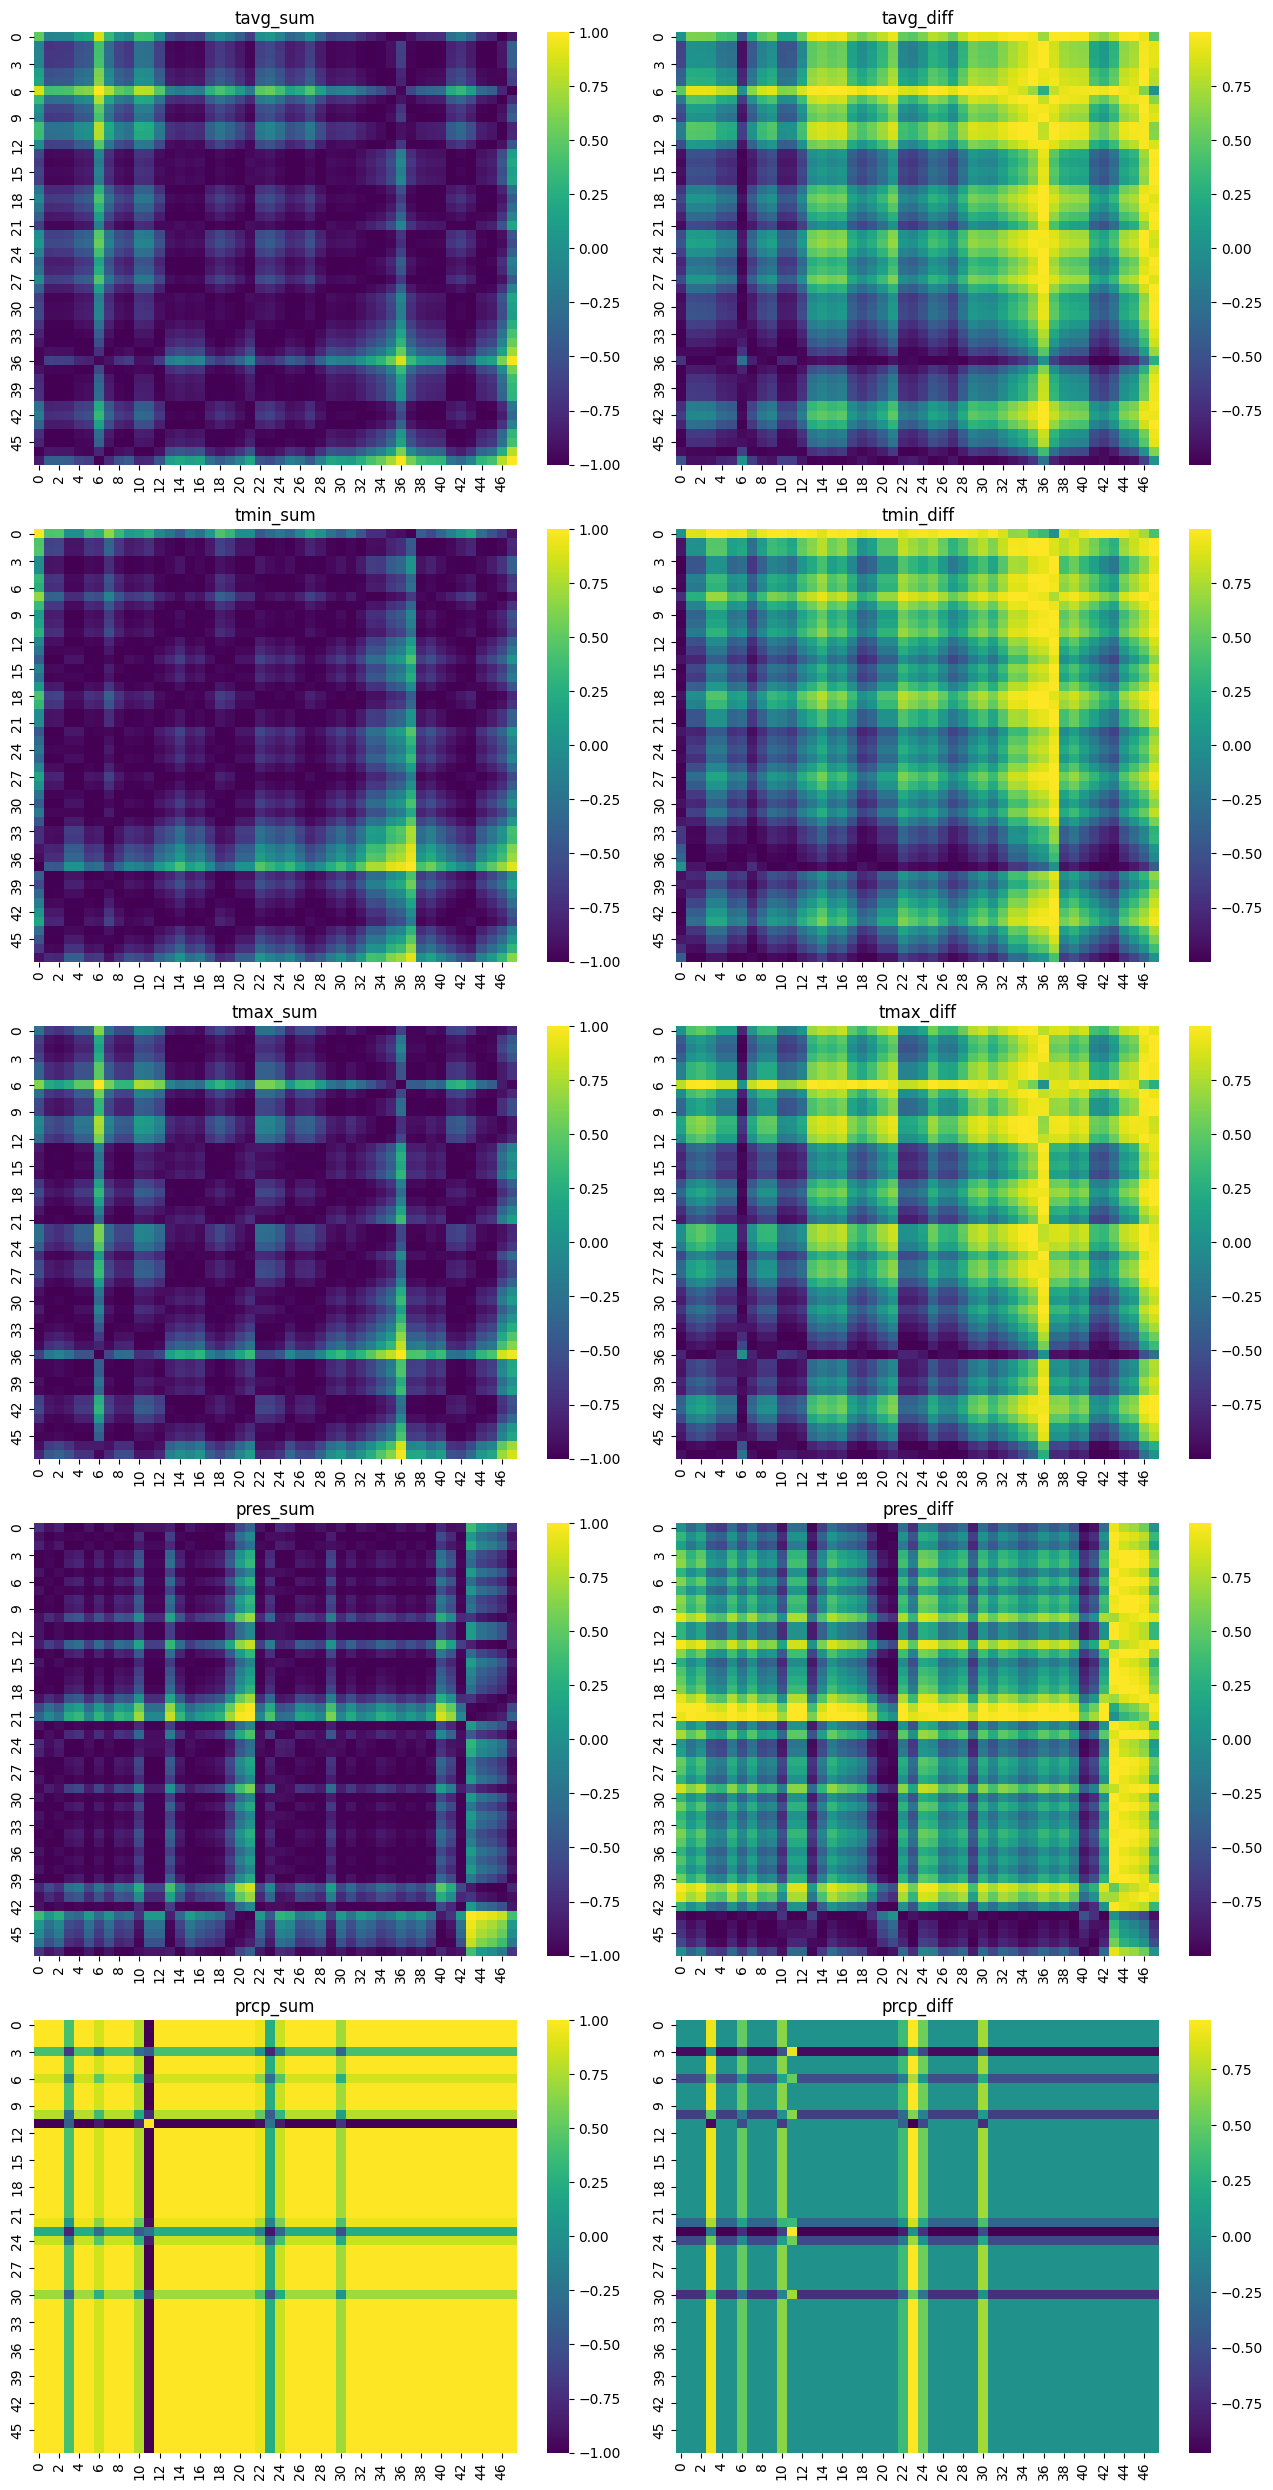

In [14]:
# Obtén las bandas de la primera ventana
first_window_channels = windows[100]

# Configuración de los gráficos
fig, axes = plt.subplots(nrows=len(data.columns), ncols=2, figsize=(13, len(data.columns)*5))

# Itera sobre las bandas y grafica cada una
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(first_window_channels[:, :, i], ax=ax, cmap='viridis', cbar=True)
    
    title = data.columns[i//2] + "_" + "sum" if i%2 == 0 else data.columns[i//2] + "_" + "diff" 
    ax.set_title(title)

plt.tight_layout()
plt.show()


In [15]:
print(X.shape, y.shape)

(6161, 48, 48, 10) (6161,)


In [16]:
TRAIN_SAMPLE = 0.8

split_index = int(TRAIN_SAMPLE * len(X))
X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

In [17]:
# Assuming 'target' is a binary classification target variable (0 or 1)
# Find indices of each class
indices_class_0 = np.where(y_train == 0)[0]
indices_class_1 = np.where(y_train == 1)[0]

# Calculate the minimum number of samples in any class
min_samples = min(len(indices_class_0), len(indices_class_1))

# Undersample each class to have the minimum number of samples
undersampled_indices_class_0 = resample(indices_class_0, n_samples=min_samples, replace=False, random_state=42)
undersampled_indices_class_1 = resample(indices_class_1, n_samples=min_samples, replace=False, random_state=42)

# Concatenate undersampled indices
undersampled_indices = np.concatenate([undersampled_indices_class_0, undersampled_indices_class_1])

total_sample = int(undersampled_indices.shape[0] * TRAIN_SAMPLE)

# Shuffle the undersampled indices
np.random.shuffle(undersampled_indices)

# Use undersampled indices to create new datasets
X_train, y_train = X[undersampled_indices, :, :], y[undersampled_indices]


In [18]:
# split_index = int(0.8 * len(X))
# X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with binary activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall']) # metrics=['accuracy']

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)


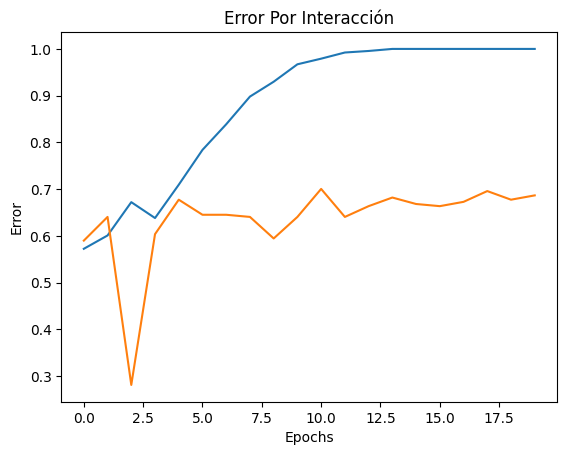

In [19]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title("Error Por Interacción")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [20]:
# Evaluate the model on the test set
acuracy = model.evaluate(X_test, y_test, verbose=0)[1]
# print(recall)
print(f"Acuracy on the test set: {acuracy * 100:.2f}%")
# 67.32%

Acuracy on the test set: 45.31%


39/39 [==============================] - 2s 50ms/step


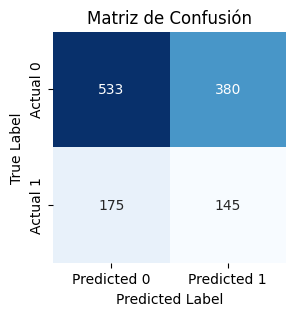

              precision    recall  f1-score   support

           0       0.75      0.58      0.66       913
           1       0.28      0.45      0.34       320

    accuracy                           0.55      1233
   macro avg       0.51      0.52      0.50      1233
weighted avg       0.63      0.55      0.58      1233



In [21]:
# Suponiendo que ya tienes las predicciones y las etiquetas reales
predictions = model.predict(X_test)
threshold = 0.5
predicted_labels = (predictions > threshold).astype(int)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Crear un DataFrame con la matriz de confusión
confusion_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Crear un mapa de calor utilizando seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()
# 784 129
# 274 46

# 741 172
# 247 73
print(classification_report(y_test, predicted_labels))

## LSTM

In [22]:
# Objetivo Predecir si llueve o no
data['rains'] = (data['prcp'] > 0.1)
data = data.dropna(how = 'any', subset = 'rains').drop(columns = 'prcp', errors = 'ignore')
data['rains'] = data['rains'].astype(int)
data.head()

,tavg,tmin,tmax,pres,rains
time,,,,,
2006-01-01,7.1,5.8,10.1,1017.318656,0
2006-01-02,6.5,3.9,11.1,1017.318656,0
2006-01-03,6.2,2.9,10.8,1017.318656,0
2006-01-04,5.0,0.0,10.4,1017.318656,0
2006-01-05,4.9,1.9,10.1,1017.318656,1


In [23]:
WINDOW_SIZE = 7

EPOCHS = 20
BATCH_SIZE = 32

feature_cols = ['tmin', 'tavg', 'tmax', 'pres']
target_col   = 'rains'

In [24]:
def create_sequences(data, sequence_length):
    sequences = []
    target = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length][feature_cols].values
        label = data.iloc[i+sequence_length][target_col]
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)


In [25]:
def build_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [26]:
sequences, target = create_sequences(data, WINDOW_SIZE)

In [27]:
TRAIN_SAMPLE = 0.8
VAL_SAMPLE   = 0.1
total_sample = int(sequences.shape[0] * TRAIN_SAMPLE)
x_train, y_train = sequences[:total_sample, :, :], target[:total_sample]

# start_sample = total_sample
# total_sample = int(sequences.shape[0] * (TRAIN_SAMPLE + VAL_SAMPLE))
# 
# x_val  , y_val   = sequences[start_sample:total_sample, :, :], target[start_sample:total_sample]
x_test , y_test  = sequences[total_sample:, :, :], target[total_sample:]

undersampler = RandomUnderSampler(random_state=42)
x_train, y_train = undersampler.fit_resample(x_train.reshape((-1,WINDOW_SIZE*len(feature_cols))), y_train)
x_train = x_train.reshape((-1, WINDOW_SIZE, len(feature_cols)))
print(x_train.shape, y_train.shape)

scaler  = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, len(feature_cols))).reshape((-1, WINDOW_SIZE, len(feature_cols)))
# x_val   = scaler.transform(x_val.reshape(-1, len(feature_cols))).reshape((-1, WINDOW_SIZE, len(feature_cols)))
x_test  = scaler.transform(x_test.reshape(-1, len(feature_cols))).reshape((-1, WINDOW_SIZE, len(feature_cols)))


(2140, 7, 4) (2140,)


In [28]:
model = build_model(input_shape=(WINDOW_SIZE, len(feature_cols)))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(
    x_train, y_train, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    # validation_data=(x_val, y_val), 
    validation_split = 0.1,
    verbose = 0
)


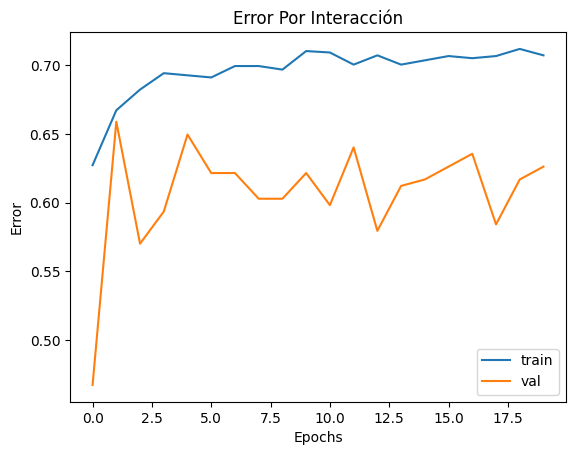

In [29]:
plt.plot(history.history['accuracy'], label = "train")
plt.plot(history.history['val_accuracy'], label = "val")
plt.title("Error Por Interacción")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

39/39 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       948
         1.0       0.42      0.53      0.47       293

    accuracy                           0.72      1241
   macro avg       0.63      0.65      0.64      1241
weighted avg       0.74      0.72      0.73      1241



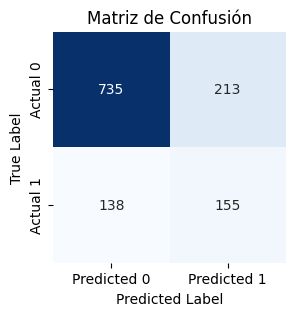

In [30]:
# Suponiendo que ya tienes las predicciones y las etiquetas reales
predictions = model.predict(x_test)
threshold = 0.5
predicted_labels = (predictions > threshold).astype(int)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predicted_labels)
print(classification_report(y_test, predicted_labels))

# Crear un DataFrame con la matriz de confusión
confusion_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Crear un mapa de calor utilizando seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()
